In [1]:
# https://charlesreid1.github.io/circe/Digit%20Classification%20-%20PCA%20and%20SVC.html


In [2]:
%matplotlib inline

import numpy as np

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

# utils
import os, re
from pprint import pprint

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [4]:
# load data

FEATURES_PATH = "../feature"

aco, label = np.load(f"{FEATURES_PATH}/acoustic_0.npy"), np.load(F"{FEATURES_PATH}/label_0.npy").reshape(-1, 1)

for i in range(1, 6):
    # load chunk
    aco_i, label_i = np.load(f"{FEATURES_PATH}/acoustic_{i}.npy"), np.load(F"{FEATURES_PATH}/label_{i}.npy")
    # stack
    aco, label = np.vstack((aco, aco_i)), np.vstack((label, label_i.reshape(-1, 1)))


print(f"acoustic: {aco.shape}", f"labels: {label.shape}")


acoustic: (1441, 64) labels: (1441, 1)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(aco, label.ravel(), random_state=101, test_size=0.2)

print(x_train.shape, y_train.shape)


(1152, 64) (1152,)


In [6]:
# transform into reduced dimension space

n = 10
pca_50 = PCA(n_components=n, whiten=True)

pca_50.fit(x_train)
x_red = pca_50.transform(x_train)


In [41]:
steps = [
    ('PCA', PCA(n_components=30)),
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='rbf'))
    ]
        
# pipeline
pipeline = Pipeline(steps)

svc = pipeline.fit(x_train, y_train)


In [42]:
train_acc = float(svc.score(x_train, y_train) * 100)

print("---- train accuracy %s ----" % train_acc)

---- train accuracy 85.24305555555556 ----


In [43]:
predictions = svc.predict(x_test)


In [52]:
label_map = {
    1: "neutral", 
    2: "calm", 
    3: "happy", 
    4: "sad", 
    5: "angry", 
    6: "fearful", 
    7: "disgust", 
    8: "surprised"
    }


              precision    recall  f1-score   support

           1       0.60      0.15      0.24        20
           2       0.52      0.78      0.62        36
           3       0.71      0.61      0.66        33
           4       0.58      0.54      0.56        46
           5       0.80      0.80      0.80        41
           6       0.62      0.70      0.66        37
           7       0.59      0.56      0.58        39
           8       0.62      0.65      0.63        37

    accuracy                           0.63       289
   macro avg       0.63      0.60      0.59       289
weighted avg       0.63      0.63      0.62       289

---- accuracy score 62.629757785467135 ----


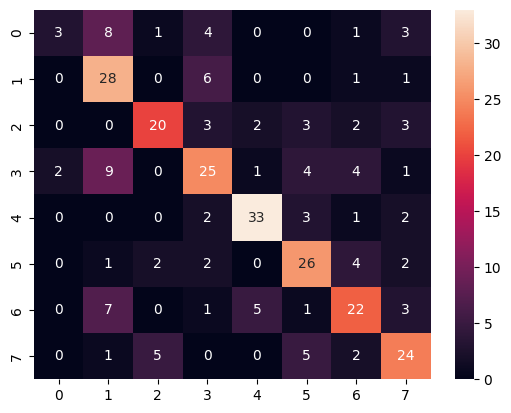

In [45]:
# performance validation

import pandas as pd

print(classification_report(y_test, predictions))

acc = float(accuracy_score(y_test, predictions)) * 100
print("---- accuracy score %s ----" % acc)

cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='')
plt.show()


In [13]:
'''
total = pca_cm.sum(axis=None)
correct = pca_cm.diagonal().sum()

print("50-component PCA accuracy: %0.2f %%"%(100.0 * correct / total))
'''


50-component PCA accuracy: 35.59 %


In [54]:
feat = np.load("news/features.npy")

clip_predictions = svc.predict(feat)

label_predictions = [label_map[i] for i in clip_predictions]


In [56]:
import json

f = open("news/phrases.json")

phrases = json.load(f)

In [59]:
label_phrases = []

for lab, phrase in zip(label_predictions, phrases):

    phrase['emotion'] = lab
    label_phrases.append(phrase) 


In [63]:
with open("news/fox_phrases.json", 'w') as f:
    json.dump(label_phrases, f, indent=4)
